#Quiz
> 다음 사이트에서 데이터를 다운받아 분석하시오
* https://data.seoul.go.kr/dataList/10280/S/2/datasetView.do
1. 여러분이 서울 시장이라고 가정하고 서울 시민의 건강 관리를 위해 운동 공원을 만들려고 한다. 데이터를 분석하여 어디에 만들지 결과를 도출하시오
2. 여러분이 헬스장을 오픈하려 합니다. 성공적으로 헬스장을 운영하기 위한 여러 방안들을 분석하여 운영계획을 수립해 보세요

##1. 파일 읽어 오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd

filepath = '/content/drive/MyDrive/3. 파이프라인/data/report.txt'
# df = pd.read_csv(filepath)
df = pd.read_csv(filepath, sep='\t')
df[:5]

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,2019,서울시,서울시,46.8,5.0,4.3,37.3,5.2,1.4
1,2019,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,2019,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,2019,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,2019,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1


>현재 구분자가 탭(\t)으로 되어 있음으로 sep를 \t로 설정한다.

##2. 데이터 구조 분석
> 결측치와 이상치를 확인하시오

In [ ]:
df.info()

> 결측치는 존재하지 않는다.

In [11]:
df.describe()

,기간,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서
count,52.0,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2019.0,46.267308,5.103846,4.655769,37.153846,5.163462
std,0.0,10.723709,2.211109,1.868145,8.666217,2.020001
min,2019.0,10.700000,0.400000,1.200000,17.900000,0.900000
25%,2019.0,42.775000,4.125000,3.300000,32.550000,4.075000
50%,2019.0,46.900000,4.850000,4.400000,35.850000,5.250000
75%,2019.0,52.100000,6.050000,5.700000,39.775000,6.250000
max,2019.0,69.800000,13.900000,9.900000,68.100000,10.900000


> 위의 데이터를 분석해 보면 '운동을 싫어해서'라고 하는 사람 이외에는 운동을 하고자 하는 의지가 있다고 한단할 수 있다.

> 1번 문제에서 운동 공원을 만들기 위해서는 다음 상황에 맞는 위치를 찾는 것이 좋을 듯 하다.
* 운동을 할 충분한 시간이 없어서 : 응답이 가장 적은 위치
*	함께 운동을 할 사람이 없어서 : 운동을 하면서 친해질 수도 있으니 배제
*	운동을 할 만한 장소가 없어서 : 응답이 많은 위치를 선정
*	운동을 할 충분한 비용이 없어서 : 응답이 많은 위치를 선정

> 결론적으로 '운동을 할 만한 장소가 없어서'와 '운동을 할 충분한 비용이 없어서'의 응답이 많은 지역 중 '운동을 할 충분한 시간이 없어서'의 응답이 가장 적은 지역을 찾아 운동 시설을 만들면 될 듯하다.

##3. 문제 해결을 위한 데이터 정제

In [ ]:
df.head()

In [ ]:
df.tail()

>head와 tail 그리고 describe 을 통해 확인한 결과 기간은 2019년도로 고정되어 있어 분석에 필요 없는 데이터이다. 

###3.1 기간 확인 및 중복 제거
>drop_duplicates함수를 이용하여 2019이외의 다른 값이 있는지 확인해 보고 중복을 제거해 보자

In [ ]:
df['기간'].drop_duplicates()

In [ ]:
df.drop(labels=['기간'], axis=1, inplace=True)

In [ ]:
df.head()

###3.2 대분류 확인 및 중복 제거

In [ ]:
df['대분류'].drop_duplicates()

> 대분류 결과를 보면 다음과 같다.
* 서울시 : 전체 정리 내용
* 성별 : 남, 녀를 기준으로 분류되어 있음
* 연령별 : 10, 20, 30, 40, 50, 60대 이상으로 분류
* 학력별 : 중, 고, 대, 대학원으로 분류
* 소득별 : 100만원 미만, 100-200만원 미만, 200-300만원 미만, 300-400만원 미만, 400-500만원 미만, 500만원 이상으로 분류
* 혼인상태별 : 기혼, 미혼, 이별사혼기타로 분류
* 지역대분류 : 도심권, 동북권, 서북권, 서남권, 동남권으로 분류
* 위의 내용을 제외한 나머지 정보는 구별 정보임


####3.2.1 1번 문제
> 1번 문제는 '운동 공원을 어느 구에 만들 것인가?'를 구하는 것이다. 따라서 필요한 정보는 구 관련 정보만 있으면 된다. 

> 구 관련 정보만 별도로 분류하여 파일로 저장하시오

In [ ]:
df_gu = df[ ~df['대분류'].isin(['서울시', '성별', '연령별', '학력별', '소득별', '혼인상태별', '지역대분류'])]
df_gu

> isin함수는 선택된 feature에서 존재하는 값이면 True를 반환하는 함수이다. 틸트(~)를 이용하여 존재하지 않는 값만 출력하는 형식으로 구현하여 구 정보만 추출하였다.

In [ ]:
df_gu.drop(labels=['대분류'], axis=1, inplace=True)
df_gu

> 구별 데이터 추출을 했지만 대분류와 분류가 같은 구 정보를 갖고 있음으로 대분류를 제거하였다.

In [25]:
file_backup = '/content/drive/MyDrive/3. 파이프라인/data/quiz_gu.csv'
df_gu.to_csv(file_backup)

>* 추후 분석 시 활용할 수도 있음으로 파일로 만들어 둠
* 현재 사용되진 않을 것임.


####3.2.2 2번 문제
> 헬스장 오픈 위치는 구별 정보를 사용하면 되며 홍보 시 성별, 나이별 데이터를 활용할 예정이다.

> 성별, 나이별 데이터를 각각 파일로 만드시오

#####3.2.2.1 성별 데이터 추출 및 백업

In [ ]:
df_gender = df[ df['대분류'].isin(['성별'])]
df_gender

> 성별 데이터만 추출

In [27]:
file_backup = '/content/drive/MyDrive/3. 파이프라인/data/quiz_gender.csv'
df_gender.to_csv(file_backup)

> 별도의 파일로 백업

#####3.2.2.2 연령별 데이터 추출 및 백업

In [ ]:
df_age = df[df['대분류'].isin(['연령별'])]
df_age

> 연령별 데이터 추출

In [32]:
file_backup = '/content/drive/MyDrive/3. 파이프라인/data/quiz_age.csv'
df_age.to_csv(file_backup)

>별도의 파일로 백업

##4. Quiz1 풀이
> 여러분이 서울 시장이라고 가정하고 서울 시민의 건강 관리를 위해 운동 공원을 만들려고 한다. 데이터를 분석하여 어디에 만들지 결과를 도출하시오

###4.1 파일 읽기
> 구 정보를 읽어 들여 describe()정보를 확인하시오

In [ ]:
import pandas as pd

filepath = '/content/drive/MyDrive/3. 파이프라인/data/quiz_gu.csv'
df_gu = pd.read_csv(filepath)
df_gu.describe()

> 현재 정보에서 'Unnamed: 0' 이 부분을 파일로 만들면서 잘 들어간 정보이므로 제거 후 사용하자

In [6]:
df_gu.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df_gu.describe()

> 위의 결과를 기반으로 우선 순위를 정해 보자 
1. 운동을 할 만한 장소가 없어서
2. 운동을 할 충분한 비용이 없어서

> '운동을 할 충분한 시간이 없어서',	'함께 운동을 할 사람이 없어서',	'운동을 싫어해서' 이 세 가지는 운동 공원이 만들어 진다고 해결되는 것이 아님으로 배제한다.

###4.2 정렬 및 부분 추출
> '운동을 할만한 장소가 없어서'를 기준으로 내림차순으로 정렬하고 '분류', '운동을 할 만한 장소가 없어서', '운동을 할 충분한 비용이 없어서' 이 세 가지 결과만 출력하시오

In [ ]:
df_gu_sort = df_gu.sort_values(by=['운동을 할 만한 장소가 없어서'], axis=0, ascending=False)
df_gu_sort

> feature를 기준으로 정렬할 것이기 때문에 sort_values 함수를 이용했으며 내림차순으로 정렬해야 함으로 ascending 옵션을 False로 설정했다.

In [ ]:
df_gu_sort_part = df_gu_sort[['분류', '운동을 할 만한 장소가 없어서', '운동을 할 충분한 비용이 없어서']]
df_gu_sort_part

>위와 같이 분석에 필요한 정보들만 추출했다.

In [ ]:
df_gu_sort_part.rename(
    columns={
        df_gu_sort_part.columns[0]:'구분',
        df_gu_sort_part.columns[1]:'장소부족',
        df_gu_sort_part.columns[2]:'비용부족'
    },
    inplace=True
)

> rename은 column 정보를 변경할 때 사용되는 함수이다. 위에서 보듯이 columns 정보를 dict 형식으로 입력받아 각 위치의 정보를 변경할 수 있다.

In [ ]:
df_gu_sort_part

###4.3 종합 점수 구하기
>장소부족과 비용부족의 비율을 6:4로 주어 각 수치에 가중치를 적용한 점수를 구하여 종합 점수로 구분 짓고 종합점수 기준으로 top 5만 추출할 수 있도록 코딩하시오

In [ ]:
df_gu_sort_part['종합점수'] =df_gu_sort_part['장소부족']*0.6 + df_gu_sort_part['비용부족']*0.4
df_gu_sort_part

> 장소 부족과 비용 부족에 비율이 6:4임으로 60%인 0.6과 40%은 0.4를 각 데이터에 곱하여 종합점수를 구하였다.

In [ ]:
df_gu_sort_part = df_gu_sort_part.sort_values(by='종합점수', ascending=False)
df_gu_sort_part_top5 = df_gu_sort_part.head()
df_gu_sort_part_top5

> 종합 점수 기준으로 ascending 옵션을 적용하여 내림차순으로 정렬한 후 head함수를 이용하여 top 5를 선정했다.

###4.4 시각화

####4.4.1 한글 깨짐현상 해결

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt

plt.rcParams['font.family']='NanumGothic'

> 한글 깨짐 현상을 해결하기 위해 나눔고딕을 설치한 후 위와 같이 그래프에 설정을 한다.

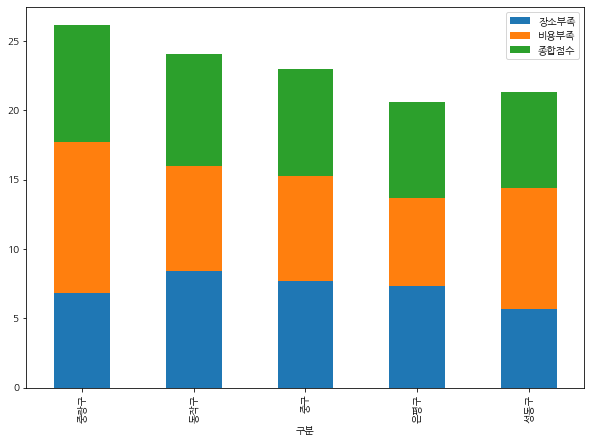

In [16]:
# df_gu_sort_part_top5.plot(x='구분', kind='bar')
df_gu_sort_part_top5.plot(x='구분', kind='bar', stacked=True, figsize=(10, 7))

>stacked는 여러 막대를 하나로 합칠 경우 사용된다.

##5 Quiz2
> 여러분이 헬스장을 오픈하려 합니다. 성공적으로 헬스장을 운영하기 위한 여러 방안들을 분석하여 운영계획을 수립해 보세요

###5.1 데이터 읽기

In [ ]:
dir = '/content/drive/MyDrive/3. 파이프라인/data/'
file=['quiz_age.csv', 'quiz_gender.csv', 'quiz_gu.csv']

df_age = pd.read_csv(dir+file[0])
df_gender = pd.read_csv(dir+file[1])
df_gu = pd.read_csv(dir+file[2])
df_gu

> 3개의 파일이 같은 경로에 있음으로 별도로 dir라는 변수에 경로를 저장하고 각 파일은 리스트로 만들었다.


In [ ]:
# df_age.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
# df_gender.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
# df_gu.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

def remove_unnamed(data_frame):
  data_frame.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

remove_unnamed(df_age)
remove_unnamed(df_gender)
remove_unnamed(df_gu)
df_gu

> 이전 index 정보를 제거하기 위해 remove_unnamed 함수를 만들었다.

In [ ]:
df_gu

>위의 내용을 다음과 같이 분석할 수 있다.

> 창업을 위한 분석은 이전에 진행했던 운동 공원과는 다르게 접근해야 한다. 우선 배제해야 할 부분은 다음과 같다.
* 운동을 싫어해서
* 운동을 할 충분한 비용이 없어서

> 나머지 데이터로 우선 순위를 정하면 다음과 같다.
1. 운동을 할 만한 장소가 없어서 : 장소만 있으면 가능
2. 함께 운동을 할 사람이 없어서	: PT를 통해 함께할 사람 연결
3. 운동을 할 충분한 시간이 없어서	: 가까운 거리에 헬스장이 있으면 운동을 할 가능성이 높아짐

> 위의 내용을 기반으로 헬스장 위치 선정

###5.2 점수 균등 분포

In [28]:
df_gu.describe()

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,47.424000,4.980000,4.604000,36.584000,5.068000
std,9.970802,2.933286,2.230187,10.816256,2.473648
min,21.300000,0.400000,1.200000,17.900000,1.900000
25%,42.700000,3.200000,2.700000,31.100000,2.900000
50%,46.700000,4.500000,4.700000,34.200000,5.200000
75%,50.300000,5.700000,5.900000,39.400000,6.400000
max,69.800000,13.900000,9.400000,68.100000,10.900000


>이전 문제에서 가중치를 적용하여 종합점수를 구하였다. 하지만 각 점수들의 분포가 고르지 않기 때문에 정확한 점수를 환산하지는 못했다. 

> 각 점수의 구간은 다음과 같이 나타난다.
* 운동을 할 충분한 시간이 없어서 : 21.3 ~ 69.8
*	함께 운동을 할 사람이 없어서 : 0.4 ~ 	13.9
*	운동을 할 만한 장소가 없어서 : 1.2 ~ 9.4

> 위의 값들을 100점 기준으로 변환하려면 다음과 같은 수식을 적용할 수 있다.
* (x - min)*100 / (max - min)
* x : 산출할 데이터, min : 바닥값, max : 천정값, (max-min) : 범위

In [ ]:
def Convert100(x, min, max):
  return (x - min)*100 / (max - min)

min_gu = df_gu['운동을 할 충분한 시간이 없어서'].min()
max_gu = df_gu['운동을 할 충분한 시간이 없어서'].max()

df_convert = df_gu
df_convert['운동을 할 충분한 시간이 없어서'] = df_gu['운동을 할 충분한 시간이 없어서'].apply(lambda x : Convert100(x, min_gu, max_gu))
df_convert

>apply함수는 feature에 있는 각 정보들을 x로 받고 이 값을 오른쪽의 수식으로 변환하는 기능을 한다. '운동을 할 충분한 시간이 없어서' feature의 정보 중 최소값과 최대값을 구하고 100점으로 환산하는 코드이다.

In [ ]:
features = ['운동을 할 충분한 시간이 없어서', 
      '함께 운동을 할 사람이 없어서',
      '운동을 할 만한 장소가 없어서',
]
df_convert = df_gu

for idx in range(3):
  min_gu = df_gu[features[idx]].min()
  max_gu = df_gu[features[idx]].max()

  df_convert[features[idx]] = df_gu[features[idx]].apply(lambda x : Convert100(x, min_gu, max_gu))

df_convert

> 구하고자 하는 3가지 feature정보를 리스트로 만들고 for문을 이용하여 반복해서 100점으로 치환했다.

In [ ]:
def ConvertData(data_frame, feature):
  min = data_frame[feature].min()
  max = data_frame[feature].max()

  df_tmp = data_frame
  df_tmp[feature] = data_frame[feature].apply(lambda x : (x-min)*100/(max-min))

  return df_tmp

for idx in range(3):
  df_convert = ConvertData(df_gu, features[idx])

df_convert

>위와 같이 별도의 함수를 만들어 처리할 수도 있다.

> columns 정보를 다음 내용으로 변경하시오
* '분류', '시간부족', '함께할 사람', '장소없음'

###5.3 특정 열 추출 및 열이름 변환

In [ ]:
features = [
            '분류',
            '운동을 할 충분한 시간이 없어서', 
            '함께 운동을 할 사람이 없어서',
            '운동을 할 만한 장소가 없어서',
]
df_convert_part = df_convert[features]
df_convert_part

> 전체 정보에서 위의 4가지만 분리하여 추출한다.

In [ ]:
rename_features=['분류', '시간부족', '함께할 사람', '장소없음']
df_convert_part.columns = rename_features
df_convert_part

>dataframe의 columns 속성을 이용하여 모든 column 정보를 변경할 수 있다.

###5.4 가중치
> 다음과 같이 가중치를 적용하여 종합점수를 구해보자
1. 장소없음 : 5
2. 함께할 사람 : 3
3. 시간 부족 : 2

In [43]:
df_convert_part['종합점수'] = df_convert_part['장소없음']*0.5 + df_convert_part['함께할 사람']*0.3 + df_convert_part['시간부족']*0.2
df_convert_part.sort_values(by='종합점수', ascending=False).head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,분류,시간부족,함께할 사람,장소없음,종합점수
19,동작구,36.701031,100.000000,87.804878,81.242645
0,종로구,84.329897,0.000000,100.000000,66.865979
11,은평구,44.123711,62.222222,74.390244,64.686531
14,양천구,92.577320,39.259259,57.317073,58.951778
1,중구,59.793814,19.259259,79.268293,57.370687


> 위와 같이 가중치를 적용하고 상위  Top 5를 산출해 보았다.
* 장소 없음은 높은 점수여야 헬스장이 생기면 올 확률이 높다.
* 함께할 사람은 높은 점수일 경우 PT를 등록하여 추가 매출로 연결할 수 있는 확률이 높다.
* 시간 부족은 낮은 수치어야 헬스장에 올 확률이 높다.

> 이를 기분으로 분석해 보면 최적의 장소는 동작구이며 2순위는 은평구이다. 종로구의 경우 함께할 사람의 수치가 0이므로 추가 매출이 어려워 배제시킨다. 양천구의 경우 시간이 부족하여 못하는 것이 높음으로 헬스장에 올 확률이 적다. 이를 기반으로 헬스장을 차릴 위치는 다음과 같은 순으로 추천해 주면 된다.
* 동작구 -> 은평구 -> 중구

In [45]:
df_convert_part1 = df_convert_part[df_convert_part['시간부족']<50]
df_convert_part1 = df_convert_part[df_convert_part['함께할 사람']>50]
df_convert_part1.sort_values(by='종합점수', ascending=False)

,분류,시간부족,함께할 사람,장소없음,종합점수
19,동작구,36.701031,100.000000,87.804878,81.242645
11,은평구,44.123711,62.222222,74.390244,64.686531
20,관악구,47.628866,62.222222,52.439024,54.411952
2,용산구,56.907216,52.592593,45.121951,49.720197
13,마포구,52.164948,57.037037,42.682927,48.885564


> 이전의 추천 지역은 동작구, 은평구, 중구였고 여기서는 동작구, 은평구, 관악구로 나타난다. 수치의 분포로 봐서는 관악구의 수치가 더 좋게 나타난다. 구의 특징으로 본다면 중구는 상업지구이고 관악구는 생활지구인 것도 고려해야 한다. 이런 여러 상황을 고려하여 구를 추천하면 될 듯하다.

###5.5 운동 시설 구축

In [50]:
# df_gender
features=[
          '운동을 할 충분한 시간이 없어서',	
          '함께 운동을 할 사람이 없어서'
]

> 성별 정보를 확인하고 feature 리스트를 만든다.

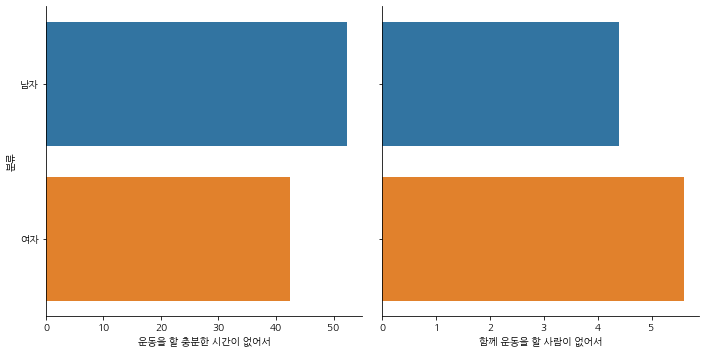

In [51]:
import seaborn as sns

pg = sns.PairGrid(df_gender, y_vars='분류', x_vars=features, height=5, aspect=1)
pg.map(sns.barplot)

> 여자가 남자보다 시간이 많고 함께 할 사람이 없어서 못하는 경우도 많음으로 여자를 위한 시설을 만들고 함께 할 수 있는 시설 위주로 만들면 성공할 확률이 높다. 따라서 다음과 같은 시설을 만들면 될 듯하다.
* 줌바댄스
* 요가
* 그룹 PT

###5.6 홍보방안
> 5.5에서 분석한 내용 기반으로 홍보를 하며 추가적으로 나이 관련 내용도 확인해 보자

In [ ]:
df_age

> 현재 나이 기준 데이터가 수치가 다름으로 100점 기준으로 치환해 보자

In [ ]:
features = ['운동을 할 충분한 시간이 없어서', 
      '함께 운동을 할 사람이 없어서',
      '운동을 할 만한 장소가 없어서',
]

for idx in range(3):
  min_age = df_age[features[idx]].min()
  max_age = df_age[features[idx]].max()

  df_age[features[idx]] = df_age[features[idx]].apply(lambda x : (x-min_age)*100/(max_age-min_age))

df_age

In [ ]:
df_age[features[0]] = df_age[features[0]].apply(lambda x : 100-x)
df_age

> 다른 두 정보와 다르게 '운동을 할 충분한 시간이 없어서'는 작을 수록 좋은 수치임으로 100에서 차감하여 높은 수치가 좋은 것으로 표현되게 변경하였다.

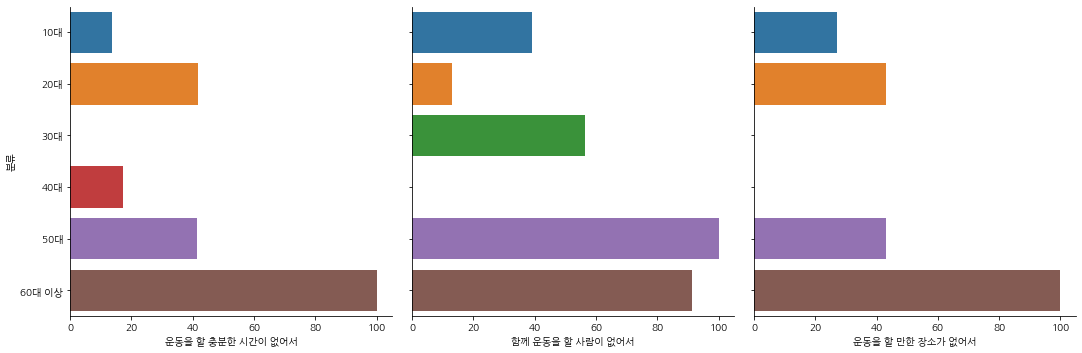

In [56]:
pg = sns.PairGrid(df_age,y_vars='분류', x_vars=features, height=5, aspect=1)
pg.map(sns.barplot)

> 연령대로 분석한 결과 60대는 전체적으로 높은 수치를 보이고 있어 별도로 홍보하지 않아도 이용을 할 것으로 예상되며 중간 데이터인 20와 50대가 비슷한 수치로 나타나는 것을 볼 수 있어 홍보는 20와 50대를 기준으로 홍보를 하면 좋을 듯하다. 30대는 함께 운동을 할 사람이 없는 부분에서 60대 다음으로 높은 수치가 나타났음으로 PT 추천은 30대에게 하는게 좋을 듯하다.